In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd

The function below creates a histogram of data split into ten separate three month periods. It is used to inspect the distribution of news articles in reference to time. 

In [61]:
def dateDistribution(publishing_dates):
    dates = [datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S") for date_str in publishing_dates]
    # Plot the distribution of dates
    plt.figure(figsize=(10, 6))
    plt.hist(dates, bins=20, color='skyblue')
    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.title('Distribution of Dates')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

We read in from each outlets csv to treat the data more flexibly through the use of a data frame. 

In [62]:
bipartisanReport_df = pd.read_csv('bipartisanreport.csv')
newsmax_df = pd.read_csv('newsmax.csv')
palmerReport_df = pd.read_csv('palmerReport.csv')
vdare_df = pd.read_csv('vdare.csv')
newsnationnow_df = pd.read_csv('newsnationnow.csv')
apnews_df = pd.read_csv('apnews.csv')
pbs_df = pd.read_csv('pbs.csv')
ricochet_df = pd.read_csv('ricochet.csv')



For each news outlet we use the date distribution function to inspect the outlets article distribution. We also print the number of articles present for each news outlet. 

source:bipartisanreport.com
total_articles:12700


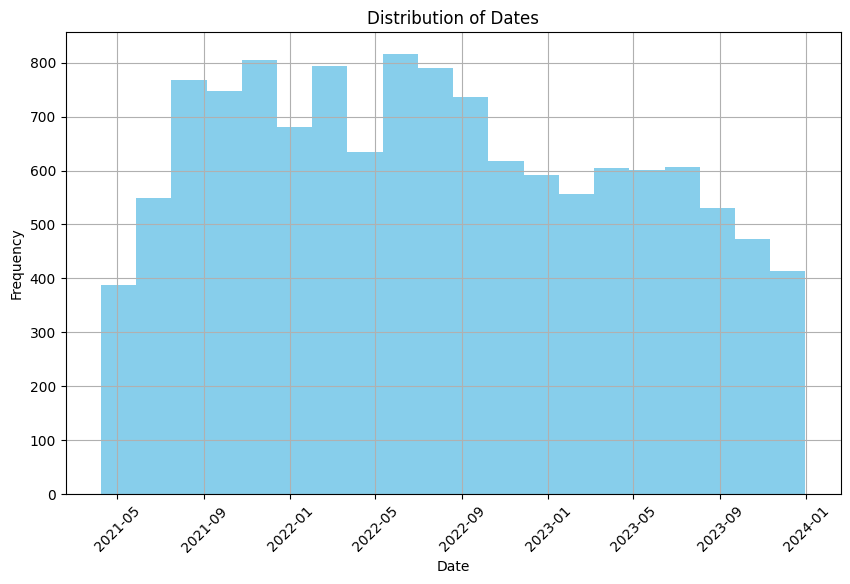

source:newsmax.com
total_articles:29850


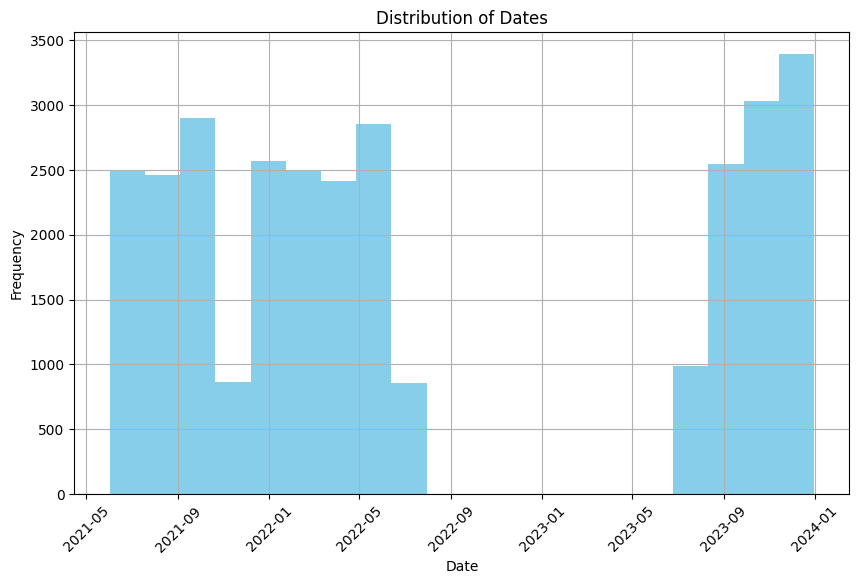

source:palmerreport.com
total_articles:9550


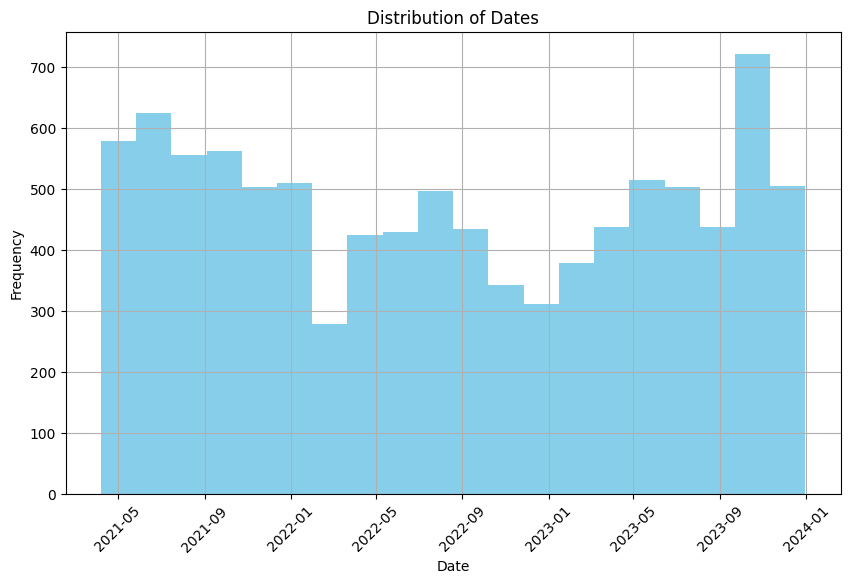

source:vdare.com
total_articles:3550


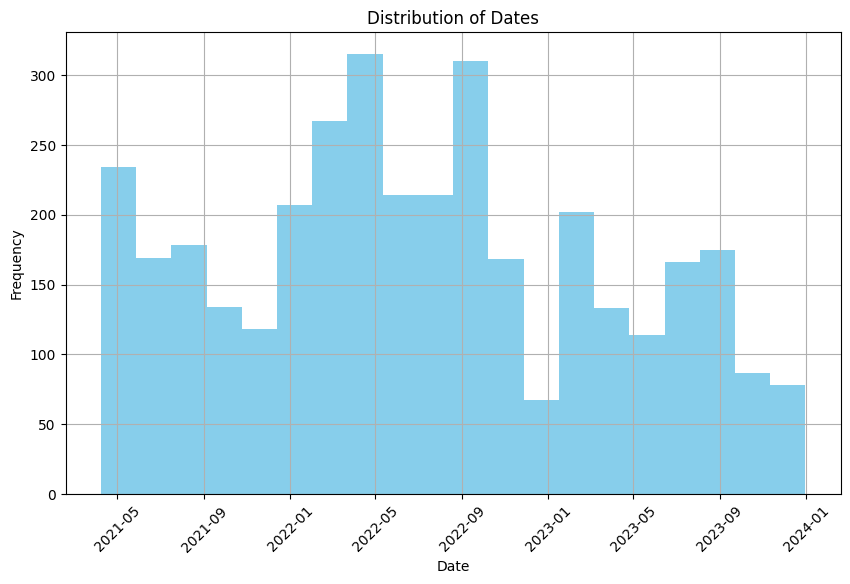

source:newsnationnow.com
total_articles:2950


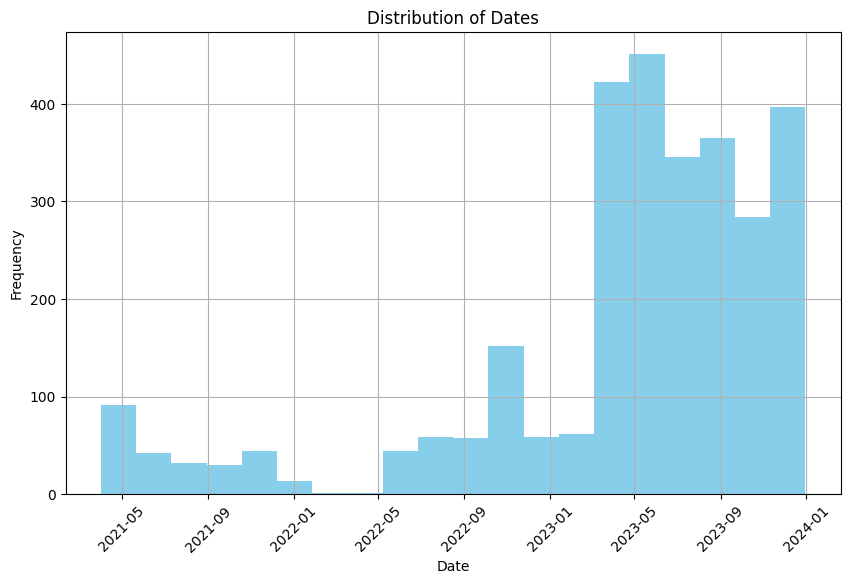

source:apnews.com
total_articles:3050


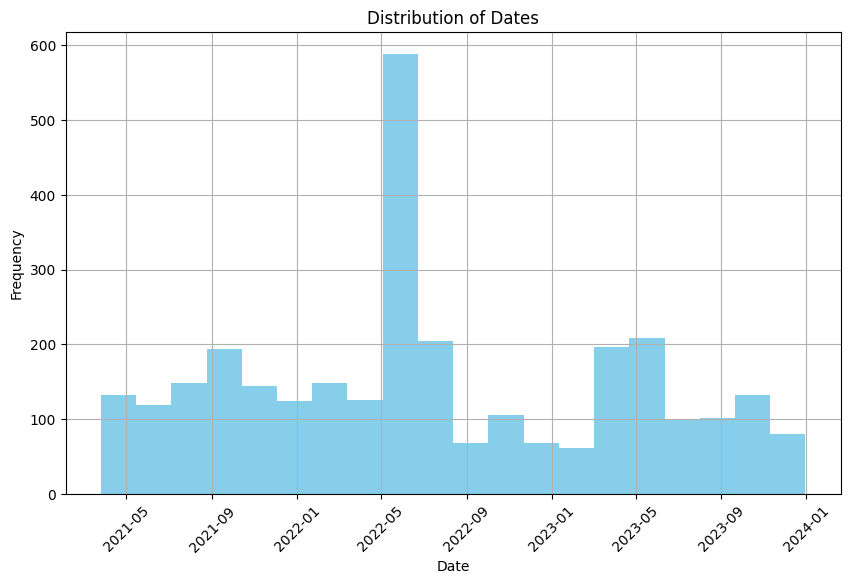

source:pbs.org
total_articles:6150


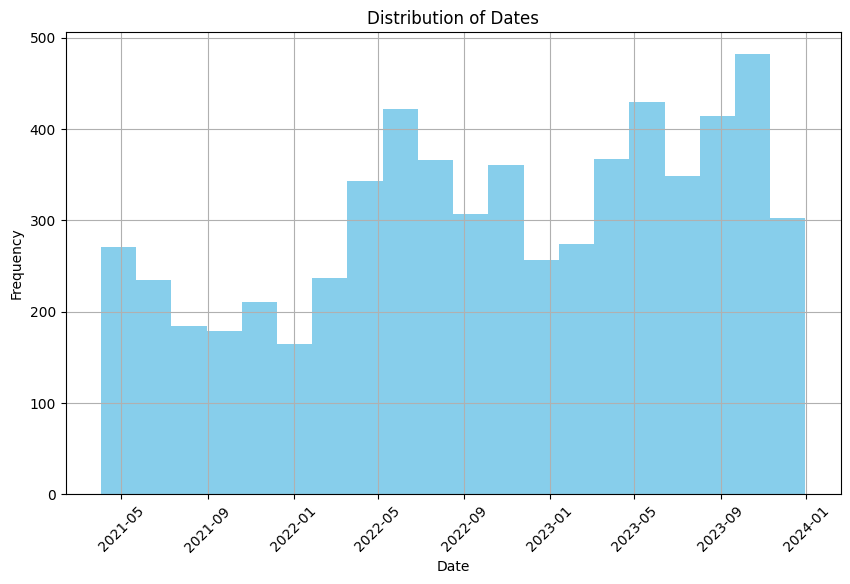

source:ricochet.com
total_articles:1790


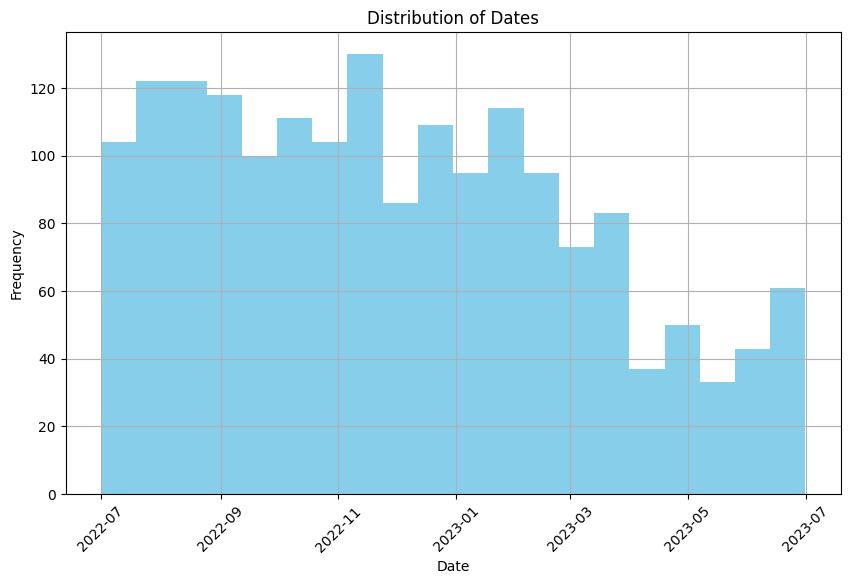

In [67]:

dfs = [bipartisanReport_df, newsmax_df, palmerReport_df, vdare_df,newsnationnow_df, apnews_df, pbs_df, ricochet_df]

for df in dfs:
    print("source:" + df["clean_url"][0])
    print("total_articles:" + str(df.shape[0]))
    dateDistribution(df["published_date"])

Thhe function below is similar to the initial date distribution function but partitions each bucket of data proportionally in reference to the number of articles pertinent to each news outlet. 

In [26]:
def dateDistributionByOutlet(df):
    # Convert 'date' column to datetime format
    df['published_date'] = pd.to_datetime(df['published_date'])

    # Define bins for the histogram
    bins = pd.date_range(start=df['published_date'].min(), end=df['published_date'].max(), freq='3M')
    
    # Initialize histogram data
    hist_data = {clean_url: [] for clean_url in df['clean_url'].unique()}

    # Calculate histogram counts per bin for each identifier
    for clean_url in df['clean_url'].unique():
        hist, _ = np.histogram(df[df['clean_url'] == clean_url]['published_date'], bins=bins)
        hist_data[clean_url] = hist

    # Plot histogram with stacked bars
    plt.figure(figsize=(10, 6))
    bottom = None
    for clean_url in df['clean_url'].unique():
        plt.bar(bins[:-1], hist_data[clean_url], width=30, label=clean_url, bottom=bottom)
        if bottom is None:
            bottom = hist_data[clean_url]
        else:
            bottom += hist_data[clean_url]

    plt.xlabel('Published Date')
    plt.ylabel('Frequency')
    plt.title('Date Distribution by News Outlet')
    plt.legend()
    plt.grid(True)
    plt.show()


    


We can see below that centre news outlets skew right significantly. 

total_articles:12150


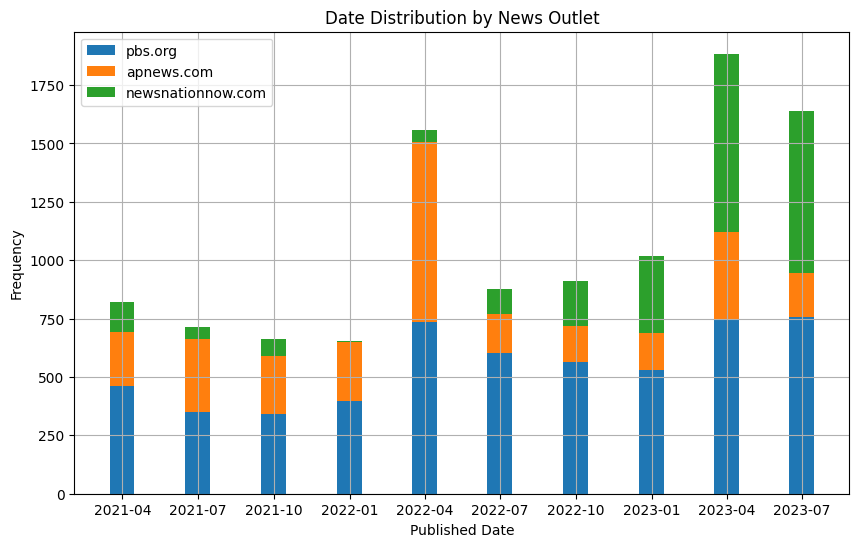

In [48]:
moderate_outlets = pd.concat([pbs_df, apnews_df, newsnationnow_df], ignore_index=True)
print("total_articles:" + str(moderate_outlets.shape[0]))
dateDistributionByOutlet(moderate_outlets)

RIght news outlets are primarily composed of newsmax articles. Aside from this issue, there is no newsmax articles available for a year long interval. 

total_articles:35190


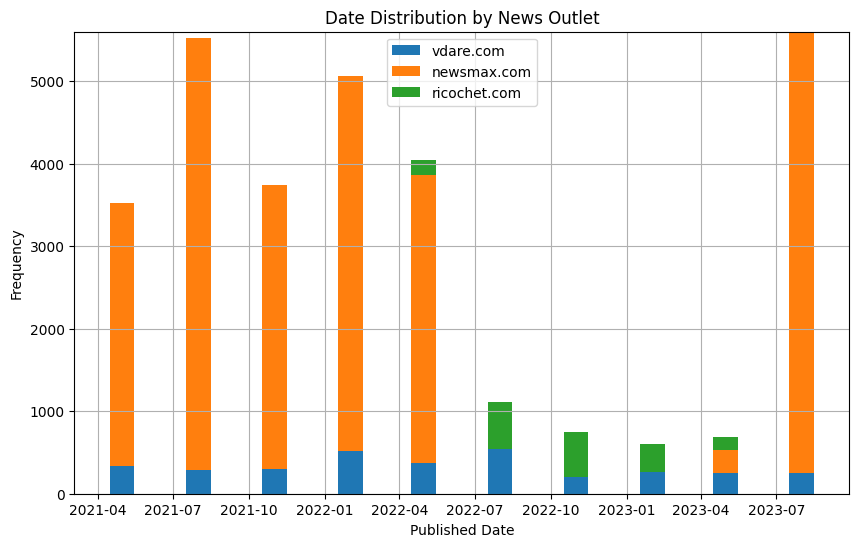

In [68]:
right_outlets = pd.concat([vdare_df, newsmax_df, ricochet_df], ignore_index=True)
print("total_articles:" + str(right_outlets.shape[0]))
dateDistributionByOutlet(right_outlets)

left leaning outlets have a fairly even distribution. 

total_articles:22250


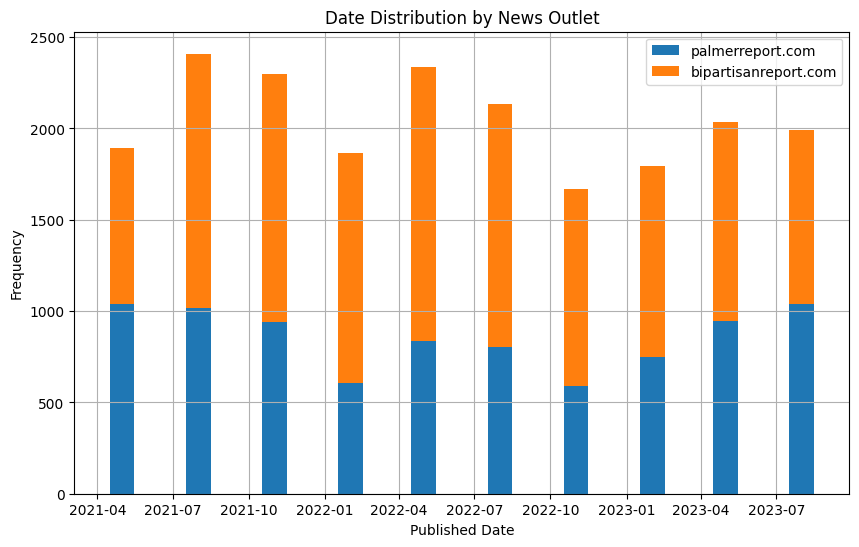

In [29]:
left_outlets = pd.concat([palmerReport_df, bipartisanReport_df], ignore_index=True)
print("total_articles:" + str(left_outlets.shape[0]))
dateDistributionByOutlet(left_outlets)

We reduce the number of articles pertaining to center outlets and at the same time methodically delete articles from certain outlets within certain time frames. It can be seen below that the distribution is now 
more even than before. 

In [49]:
# Convert published_date to datetime type
moderate_outlets['published_date'] = pd.to_datetime(moderate_outlets['published_date'])

#drop half of pbs following april 2022
#drop half oof ap news from april 2022 - july 2022
#drop half of newsnation following april 2023
flip1 = True
flip2 = True
flip3 = True
for index, row in moderate_outlets.iterrows():
    if row['clean_url'] == 'pbs.org' and row['published_date'] >= pd.Timestamp('2022-04-01'):
        if flip1: 
            moderate_outlets.drop(index, inplace=True)
        flip1 = not flip1
    
    if row['clean_url'] == 'apnews.com' and row['published_date'] >= pd.Timestamp('2022-04-01') and row['published_date'] <= pd.Timestamp('2022-07-01'):
        if flip2: 
            moderate_outlets.drop(index, inplace=True)
        flip2 = not flip2
    
    if row['clean_url'] == 'newsnationnow.com' and row['published_date'] >= pd.Timestamp('2023-04-01'):
        if flip3: 
            moderate_outlets.drop(index, inplace=True)
        flip3 = not flip3
        

total_articles:8460


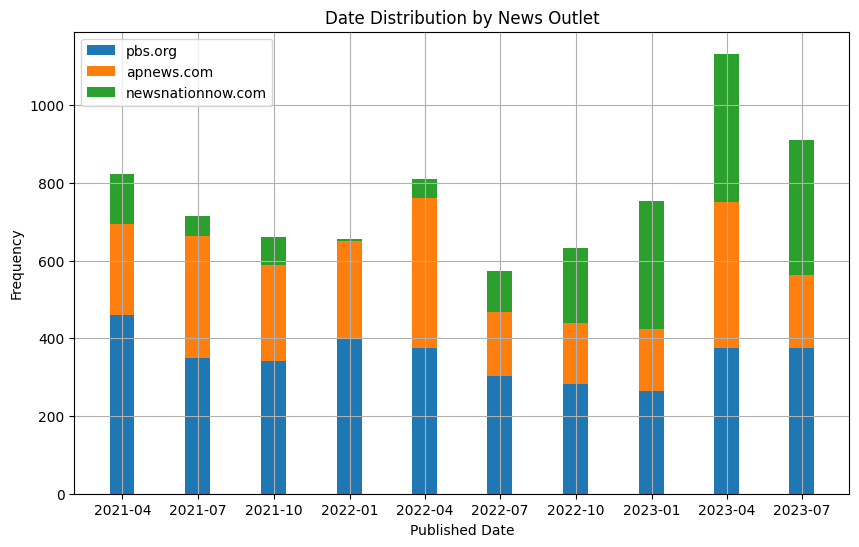

In [50]:
print("total_articles:" + str(moderate_outlets.shape[0]))
dateDistributionByOutlet(moderate_outlets)

For left leaning outlets, since both outlets are fairlyr represented, we simply delete evey other article to reduce the size of the data frame. 

In [53]:
#clean left leaning outlets by dropping half of all rows 
left_outlets = left_outlets.iloc[::2]

total_articles:11125


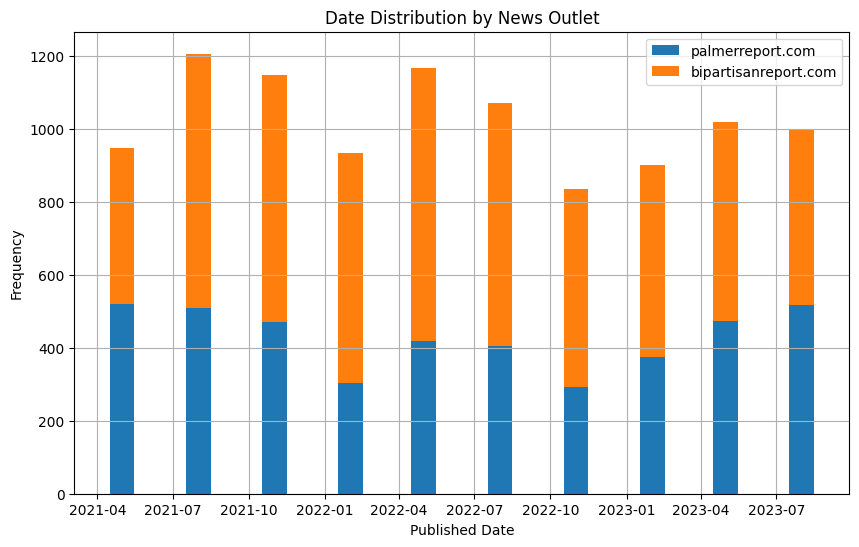

In [54]:
print("total_articles:" + str(left_outlets.shape[0]))
dateDistributionByOutlet(left_outlets)

We apprximate an even distribution with right leaning outlets by simply removing every 8th news max article.  

In [69]:
#for right leaning outlets, we first remove 80% for newsmax articles 
count = 1
for index, row in right_outlets.iterrows():
    if row["clean_url"] == 'newsmax.com':
        if count != 8:
            right_outlets.drop(index, inplace=True)
            count = count + 1
        else: 
            count = 1

total_articles:9071


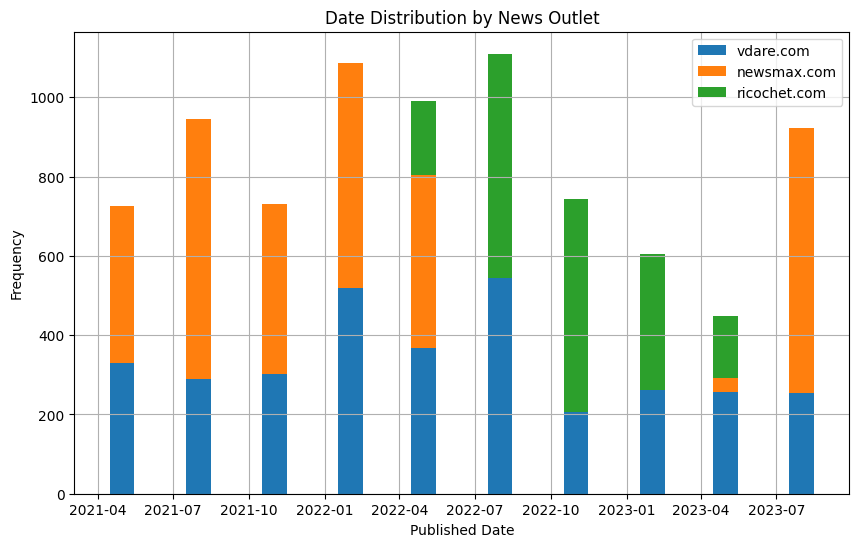

In [70]:
print("total_articles:" + str(right_outlets.shape[0]))
dateDistributionByOutlet(right_outlets)

We save the evenly distributed data frames as csvs and then reload them and plot their distribution. 

In [71]:
#save moderate outlets clean data 
moderate_outlets.to_csv("clean_data/moderate_outlets.csv")
right_outlets.to_csv("clean_data/right_outlets.csv")
left_outlets.to_csv("clean_data/left_outlets.csv")

In [72]:
center = pd.read_csv('clean_data/moderate_outlets.csv')
right = pd.read_csv('clean_data/right_outlets.csv')
left = pd.read_csv('clean_data/left_outlets.csv')

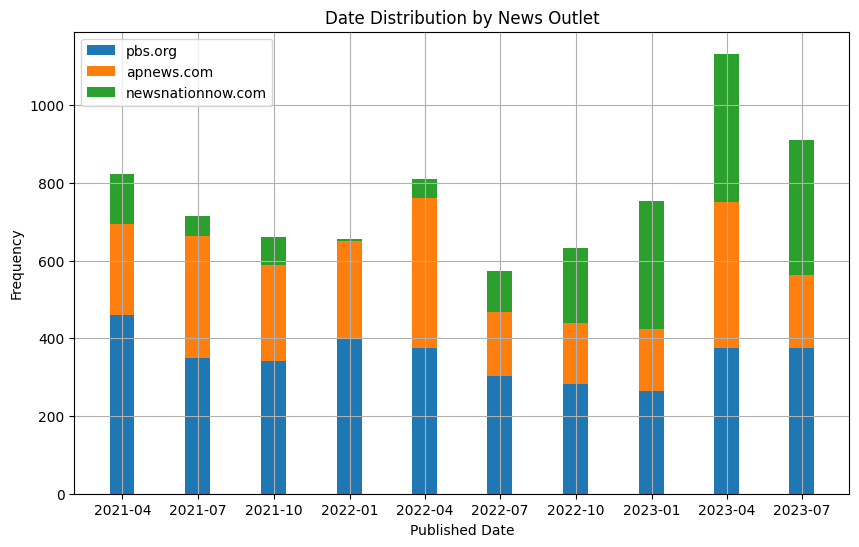

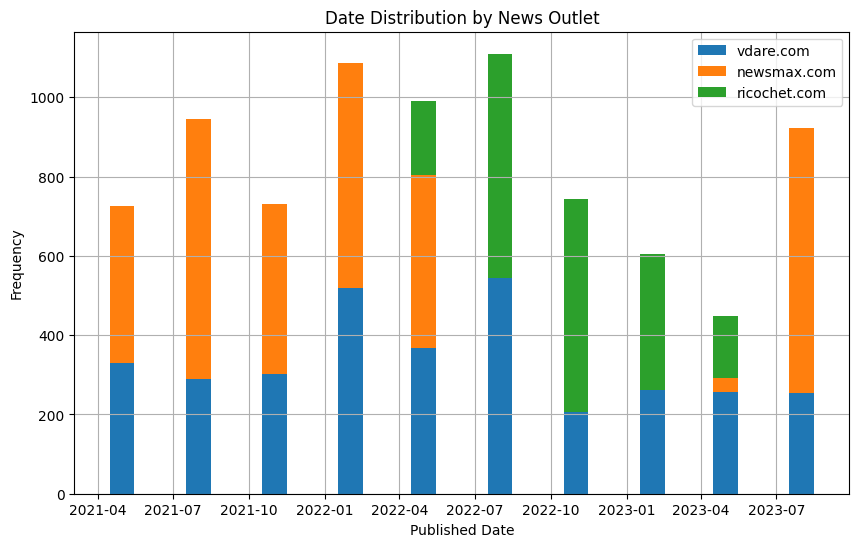

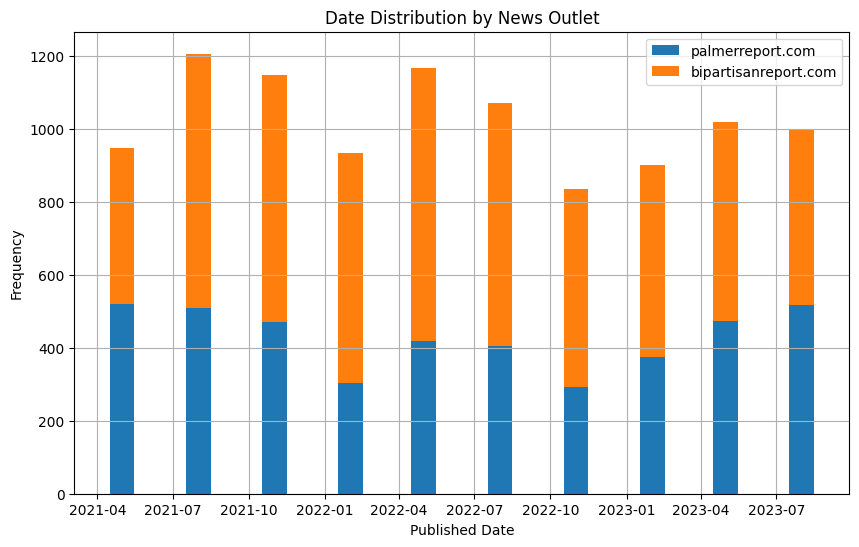

In [73]:
dateDistributionByOutlet(center)
dateDistributionByOutlet(right)
dateDistributionByOutlet(left)

Articles sourced for CNN and Fox news are shown below. Fortunatley, these articles were more evenly distributed and don't require any deletions or imputations. They will be used for testing and applying models, so their distribution is irrelevant. 

(1501, 5)


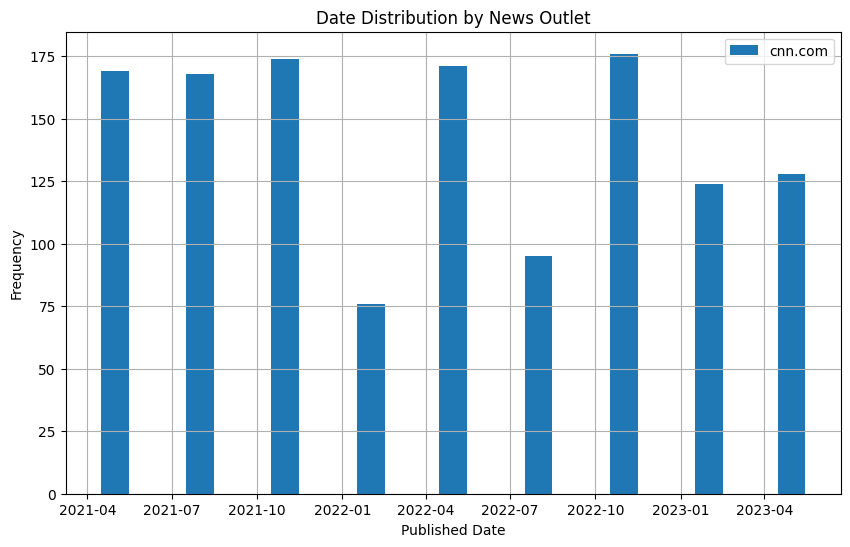

In [75]:
cnn_df = pd.read_csv('cnn.csv')
print(cnn_df.shape)
dateDistributionByOutlet(cnn_df)

(1497, 5)


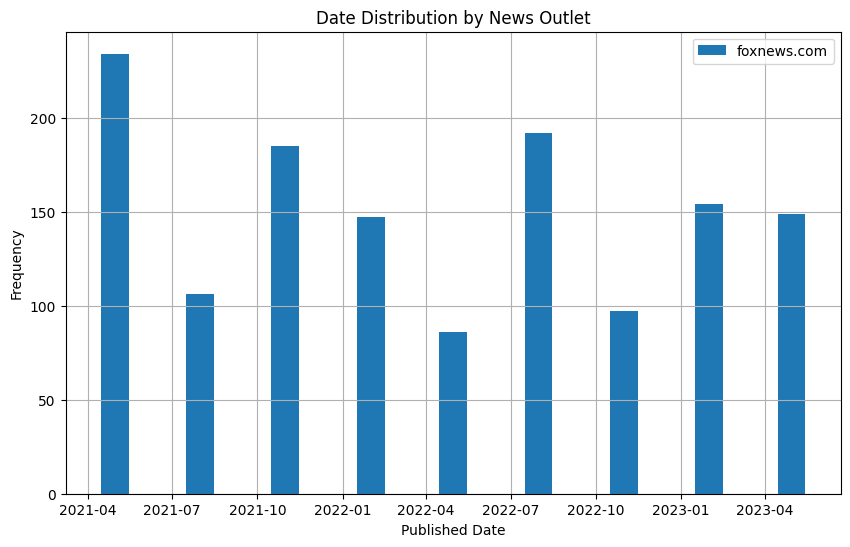

In [77]:
fox_df = pd.read_csv('foxnews.csv')
print(fox_df.shape)
dateDistributionByOutlet(fox_df)